In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings
import calendar
#import prophet
from datetime import datetime
import holidays


warnings.filterwarnings("ignore")
pd.options.display.max_columns = None

plt.rcParams["figure.figsize"] = (10,8)

In [57]:
df = pd.read_csv("data/bikes.csv", index_col = 0 )

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    object 
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(10), object(2)
memory usage: 97.0+ KB


In [59]:
df.sample(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
708,709,10-12-2019,winter,1,12,0,1,1,2,17.869153,21.77875,92.5000,12.750636,329,4841,5170
650,651,13-10-2019,winter,1,10,0,6,0,1,16.126653,19.56980,49.4583,9.791514,2252,4857,7109
695,696,27-11-2019,winter,1,11,0,2,1,2,11.958347,14.07790,78.6667,15.916654,123,3836,3959
406,407,11-02-2019,spring,1,2,0,6,0,3,9.190847,10.54335,73.1250,19.416332,192,1977,2169
592,593,16-08-2019,autumn,1,8,0,4,1,1,29.485847,32.73440,51.9167,9.500332,1338,6267,7605


- 1. En la columna yr, el 0 hace referencia a 2018 y el 1 2019 ---> cambiar a 2018 y 2019
- 2. Revisar estaciones segun meses - DONE  
- 3. Los dias de la semana pasarlos a str (texto)
- 4. Redondear temperaturas
- 5. Cambiar dteday a tipo daytime - DONE 
- 6. Comprobar festivos - columna holiday - 16 días - DONE
- 7. Los dias de la semana no corresponden con los que debieran ser - DONE
- 9. Librería calendar - dia de la semana DONE.
- 10. Chequear funcion seasons - DONE

Weathersit :
- 1: Sol y nubes
- 2: Niebla - nublado
- 3: Regulinchi
- 4: Tiempo chungo

In [60]:
df.duplicated().sum()

0

In [61]:
df.shape

(730, 16)

__________
Reasignamos columna season

In [62]:
#Cambiar columna 'dteday' a datatime

df.dteday =pd.to_datetime(df.dteday, dayfirst=True)

In [63]:
primavera = df[df['season']=='spring'] #Primavera 20 marzo - 21 junio
primavera['mnth'].unique()

array([ 1,  2,  3, 12])

In [64]:
invierno = df[df['season']=='winter'] # Invierno 21 de diciembre - 20 de marzo
invierno['mnth'].unique()

array([ 9, 10, 11, 12])

In [65]:
#Verano 21 junio - 23 septiembre 
verano = df[df['season']=='summer'] 
verano['mnth'].unique()

array([3, 4, 5, 6])

In [66]:
#Otoño 23 septiembre - 21 de diciembre
otoño = df[df['season']=='autumn'] 
otoño['mnth'].unique()

array([6, 7, 8, 9])

In [67]:
mapa_estaciones ={"spring": "winter", "winter": "autumn", "summer":"spring", "autumn":"summer"}

In [68]:
df["season"] = df["season"].map(mapa_estaciones)

In [69]:
#Primavera 21 marzo - 20 junio
#Verano 21 junio - 22 septiembre 
#Otoño 23 septiembre - 20 de diciembre
#Invierno 21 de diciembre - 20 de marzo

_________________

Ajustamos los días de la semana

In [70]:
def dia_semana(col):
    return col.isoweekday()

In [71]:
df["weekday"]= df["dteday"].apply(dia_semana)

__________


In [72]:
df.workingday.value_counts()

1    499
0    231
Name: workingday, dtype: int64

In [73]:
df.holiday.value_counts()

0    709
1     21
Name: holiday, dtype: int64

In [74]:
#festivos_18 = ["2018-01-01","2018-01-16", "2018-02-13", "2018-02-20", "2018-03-31", "2018-05-29", "2018-07-04", "2018-07-05", "2018-07-28" , "2018-09-04", "2018-10-23", "2018-10-24", "2018-12-24", "2018-12-25", "2018-12-31"]
#festivos_19 = ["2019-01-01","2019-01-16", "2019-02-13", "2019-02-20", "2019-03-31", "2019-05-29", "2019-07-04", "2019-07-05", "2019-07-28" , "2019-09-04", "2019-10-23", "2019-10-24", "2019-12-24", "2019-12-25", "2019-12-31"]

In [75]:
#df["holiday"] = df["dteday"].isin(["2018-01-01","2018-01-16", "2018-02-13", "2018-02-20", "2018-03-31", "2018-05-29", "2018-07-04", "2018-07-05", "2018-07-28" , "2018-09-04", "2018-10-23", "2018-10-24", "2018-12-24", "2018-12-25", "2018-12-31","2019-01-01","2019-01-16", "2019-02-13", "2019-02-20", "2019-03-31", "2019-05-29", "2019-07-04", "2019-07-05", "2019-07-28" , "2019-09-04", "2019-10-23", "2019-10-24", "2019-12-24", "2019-12-25", "2019-12-31"])
#df.sample(3)

In [76]:
#df.loc[df['holiday'] == False, 'holiday'] = 0
#df.loc[df['holiday'] == True, 'holiday'] = 1


In [77]:
df.sample(3)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
536,537,2019-06-21,summer,1,6,0,5,1,1,33.039153,37.62710,56.7917,7.958729,778,5127,5905
574,575,2019-07-29,summer,1,7,0,1,0,1,29.588347,33.39665,62.3750,11.416532,2153,4444,6597
368,369,2019-01-04,winter,1,1,0,5,1,2,4.407500,5.96685,41.4583,12.374900,95,2273,2368


In [78]:
df.holiday.unique()

array([0, 1])

In [79]:
#Sacamos ls festivos con la libreria 
from datetime import date
import holidays
  
us_holidays = holidays.US()
festivos_nuevo = []
for i in holidays.US(years = [2018, 2019], state = 'WA').items():
    festivos_nuevo.append(i)


In [80]:
#Creamos una lista con los festivos que faltan de la lista proporcionada por la empresa 
festivos_añadir = ['2018-02-13', '2018-03-31', '2018-07-05', '2018-07-28', '2018-11-24', '2018-12-24','2018-12-31', '2019-11-29', '2019-02-13' , '2019-03-31', '2019-07-05'
,'2019-07-28' , '2019-12-24' , '2019-12-31']

In [81]:
#Apendeamos la lista
in_holidays = holidays.HolidayBase()
in_holidays.append(festivos_añadir)

In [82]:
#Convertimos a diccionario para poder añadirlo a las vacaciones que teniamos 
dict_holidays = dict(festivos_nuevo)

In [83]:
in_holidays.update(dict_holidays)

In [84]:
lista_festivos = list(in_holidays.keys())


In [85]:
len(lista_festivos)

35

In [86]:
print(lista_festivos)

[datetime.date(2018, 2, 13), datetime.date(2018, 3, 31), datetime.date(2018, 7, 5), datetime.date(2018, 7, 28), datetime.date(2018, 11, 24), datetime.date(2018, 12, 24), datetime.date(2018, 12, 31), datetime.date(2019, 11, 29), datetime.date(2019, 2, 13), datetime.date(2019, 3, 31), datetime.date(2019, 7, 5), datetime.date(2019, 7, 28), datetime.date(2019, 12, 24), datetime.date(2019, 12, 31), datetime.date(2018, 1, 1), datetime.date(2018, 1, 15), datetime.date(2018, 2, 19), datetime.date(2018, 5, 28), datetime.date(2018, 7, 4), datetime.date(2018, 9, 3), datetime.date(2018, 10, 8), datetime.date(2018, 11, 11), datetime.date(2018, 11, 12), datetime.date(2018, 11, 22), datetime.date(2018, 12, 25), datetime.date(2019, 1, 1), datetime.date(2019, 1, 21), datetime.date(2019, 2, 18), datetime.date(2019, 5, 27), datetime.date(2019, 7, 4), datetime.date(2019, 9, 2), datetime.date(2019, 10, 14), datetime.date(2019, 11, 11), datetime.date(2019, 11, 28), datetime.date(2019, 12, 25)]


In [87]:
df["holiday"] = df["dteday"].isin(lista_festivos)
df.sample(3)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
13,14,2018-01-14,winter,0,1,False,7,1,1,6.59567,9.42065,53.7826,8.478716,54,1367,1421
459,460,2019-04-05,spring,1,4,False,5,1,1,17.83500,21.55815,37.4167,14.708443,1192,5265,6457
251,252,2018-09-09,summer,0,9,False,7,1,2,26.65000,28.94730,89.7917,8.333393,417,3127,3544


In [88]:
df.loc[df['holiday'] == False, 'holiday'] = 0
df.loc[df['holiday'] == True, 'holiday'] = 1

In [89]:
df.holiday.value_counts()

0    695
1     35
Name: holiday, dtype: int64

In [90]:
df.sample(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
461,462,2019-04-07,spring,1,4,0,7,0,1,17.937500,21.30645,25.4167,18.416357,3252,3605,6857
196,197,2018-07-16,summer,0,7,0,1,0,1,28.153347,31.91315,58.5000,13.958914,2418,3505,5923
72,73,2018-03-14,winter,0,3,0,3,1,1,13.333897,16.60000,49.6957,9.174042,359,1687,2046
289,290,2018-10-17,autumn,0,10,0,3,1,1,21.900847,25.53625,57.9583,11.750393,713,3857,4570
593,594,2019-08-17,summer,1,8,0,6,1,1,29.656653,12.12000,57.0833,15.500718,1483,5665,7148



---


In [91]:
def workingday (col_holiday, col_weekday):
    if col_holiday == 1:
        return 'NO'
    elif col_weekday == 6 or col_weekday == 7:
        return 'NO'
    else:
        return 'SI'

In [92]:
df['workingday'] = df.apply(lambda brocoli: workingday(brocoli['holiday'], brocoli['weekday']), axis = 1)

In [93]:
df.to_csv('data/01_bikes_limpieza.csv')

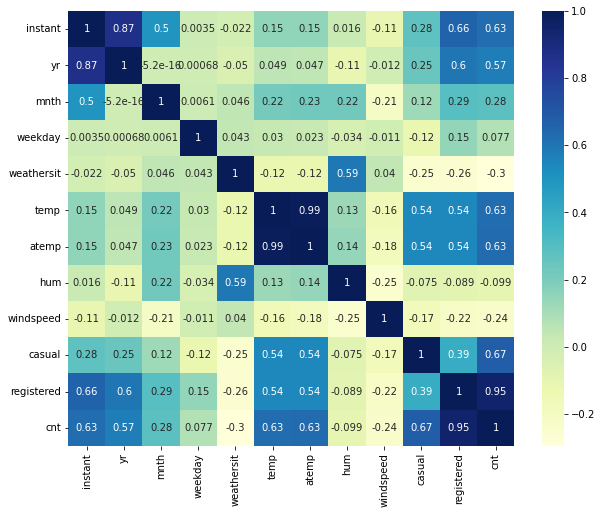

In [94]:
sns.heatmap(df.corr(), 
            cmap = "YlGnBu", 
           annot = True);

In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     730 non-null    int64         
 1   dteday      730 non-null    datetime64[ns]
 2   season      730 non-null    object        
 3   yr          730 non-null    int64         
 4   mnth        730 non-null    int64         
 5   holiday     730 non-null    object        
 6   weekday     730 non-null    int64         
 7   workingday  730 non-null    object        
 8   weathersit  730 non-null    int64         
 9   temp        730 non-null    float64       
 10  atemp       730 non-null    float64       
 11  hum         730 non-null    float64       
 12  windspeed   730 non-null    float64       
 13  casual      730 non-null    int64         
 14  registered  730 non-null    int64         
 15  cnt         730 non-null    int64         
dtypes: datetime64[ns](1), floa

_____

Apuntes sprint1:
- Graficas análisis exploratorio de cara a la demo
- Cuidado con las variables predictoras -  habrá que probar diferentes cosas
- Variables categóricas -  sacarlas de los boxplot - para poder analizar a part
- Si no cumplimos normalidad - Random forest y fuera
- Idiomas para la demo
- Conteo fuera de nuestro modelo predictivo

_____________
Homogeneizamos las columnas

In [96]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2018-01-01,winter,0,1,1,1,NO,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,2018-01-02,winter,0,1,0,2,SI,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,2018-01-03,winter,0,1,0,3,SI,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,2018-01-04,winter,0,1,0,4,SI,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,2018-01-05,winter,0,1,0,5,SI,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [97]:
df.columns.to_list

<bound method IndexOpsMixin.tolist of Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')>

In [98]:
nombres_nuevos = {'instant': "registro", 'dteday':"fecha", 'season':"estacion", 'yr':"año", 'mnth':"mes", 'holiday':"vacaciones", 'weekday':"dia_semana",
                    'workingday':"laborable", 'weathersit':"clima", 'temp':"temperatura", 'atemp':"sensacion_termica", 'hum':"humedad", 'windspeed':"viento",
                     'casual':"casuales", 'registered':"registrados", 'cnt':"totales"}

In [99]:
df.rename(columns=nombres_nuevos, inplace=True)

In [100]:
df.head(2)

,registro,fecha,estacion,año,mes,vacaciones,dia_semana,laborable,clima,temperatura,sensacion_termica,humedad,viento,casuales,registrados,totales
0,1,2018-01-01,winter,0,1,1,1,NO,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,2018-01-02,winter,0,1,0,2,SI,2,14.902598,17.68695,69.6087,16.652113,131,670,801


_____________

Separamos los df

In [101]:
df.to_csv('data/01_bikes_limpieza.csv')

In [102]:
df_registrados = df.drop(["totales", "casuales"], axis=1 )

In [103]:
df_casuales = df.drop(["totales", "registrados"], axis=1)

In [104]:
df_registrados.to_csv('data/01_bikes_registrados.csv')

In [105]:
df_casuales.to_csv('data/01_bikes_casuales.csv')